In [1]:
import numpy as np, matplotlib.pyplot as plt
# from importlib import reload
import cvflow as cf
% matplotlib inline

In [2]:
import laneFindingPipeline

In [3]:
show = cf.misc.show

In [4]:
colorFilter = cf.ComplexPipeline()

HBox(children=(IntProgress(value=0, description='cal. undistort: ', max=20), HTML(value='')))

In [5]:
laneFinder = laneFindingPipeline.LaneFinder(colorFilter=colorFilter)

In [6]:
allFrames = laneFindingPipeline.utils.loadFrames(videoPrefices=('project',), maxframes=100)

HBox(children=(IntProgress(value=0, description='load project: '), HTML(value='')))

In [7]:
frame = allFrames['project'][0]

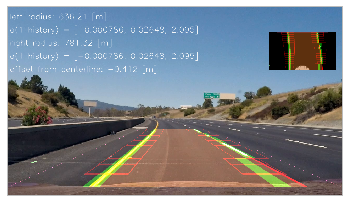

In [8]:
show(laneFinder.draw(frame));

CPU times: user 2.8 s, sys: 116 ms, total: 2.92 s
Wall time: 2.79 s


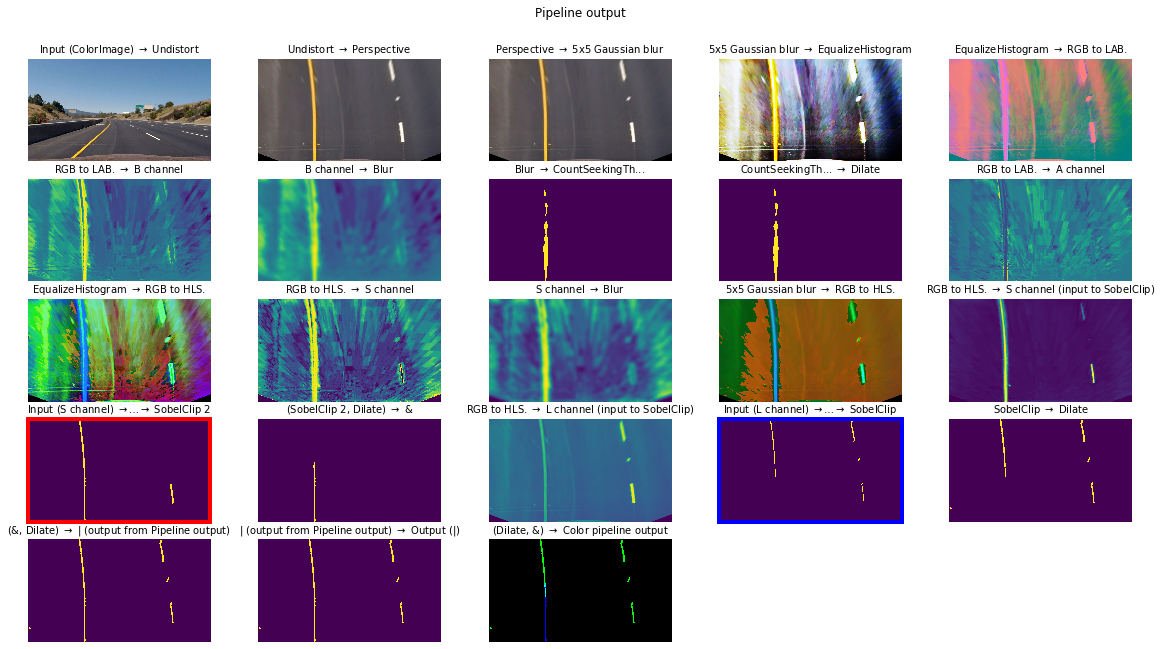

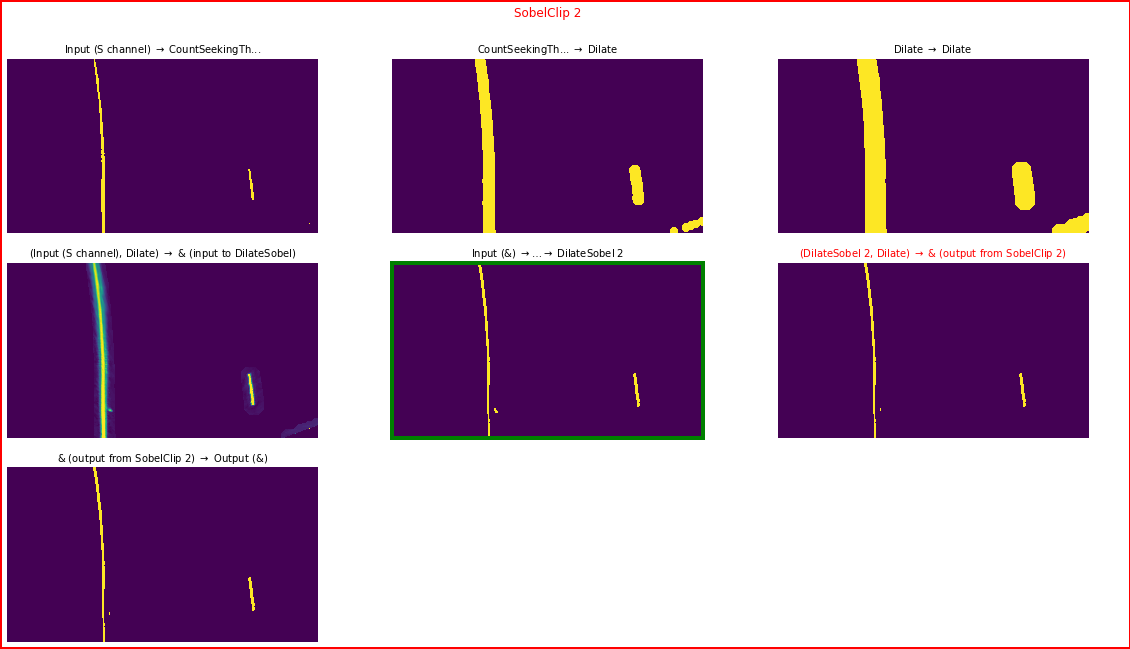

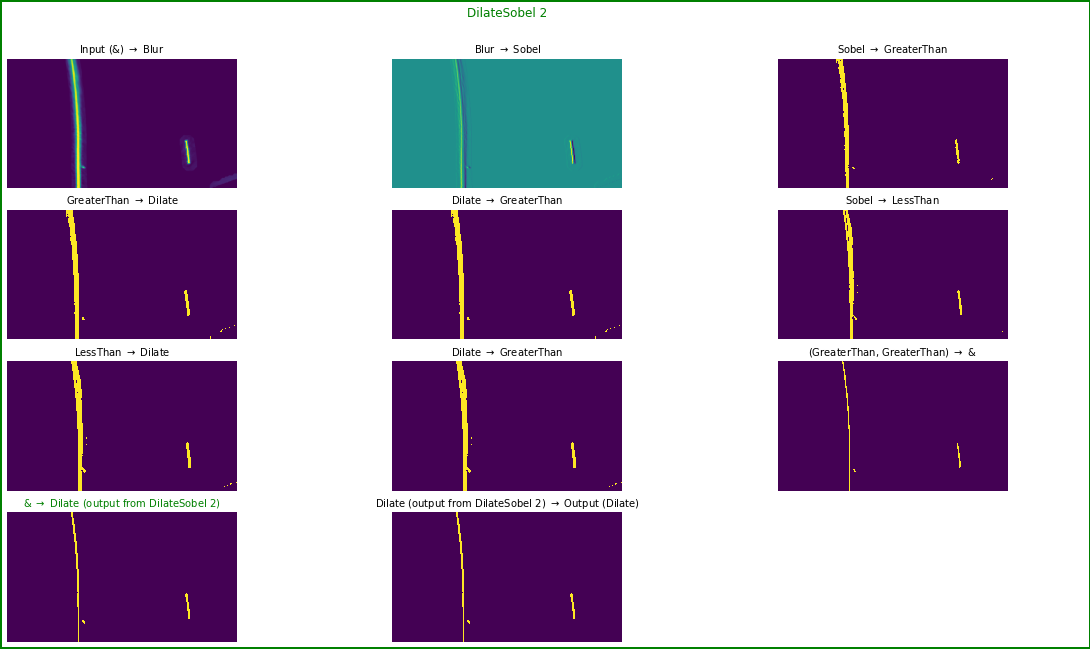

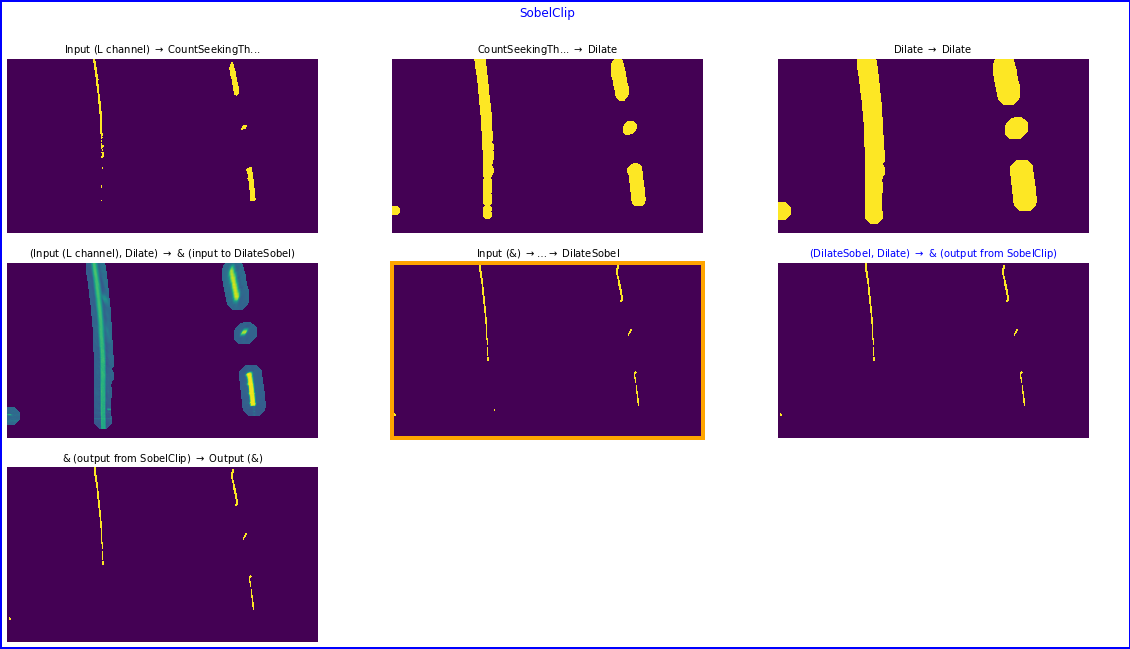

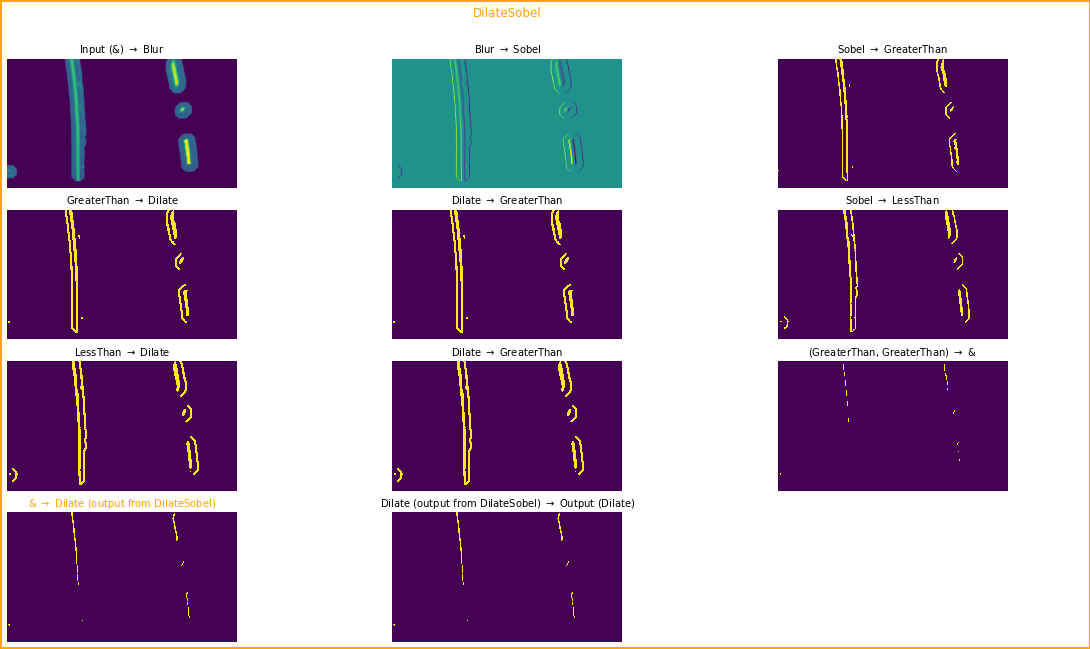

In [9]:
%%time
figs = colorFilter.showMembers(subplotKwargs=dict(figsize=(16,9)), wspace=0)
for ext in ('png',):
    for fig in figs:
        label = fig.texts[0].get_text()
        ok = 'abcdefghijklmnopqrstuvwxyz'
        ok += ok.upper() + '01234567890-'
        for ch in label:
            if ch not in ok:
                label.replace(ch, '_')


In [10]:
colorFilter.draw(savePath='/tmp/test', format='pdf');

Saved to /tmp/test.pdf.


In [11]:
colorFilter(frame).sum()

2795565

Measure frames per second without plotting.

In [14]:
%%time
import tqdm
for frame in tqdm.tqdm_notebook(allFrames['project'][:100], unit='frame'):
    laneFinder(frame)

HBox(children=(IntProgress(value=0), HTML(value='')))


CPU times: user 23.8 s, sys: 440 ms, total: 24.2 s
Wall time: 19.6 s


In [16]:
import utils
utils.transformVideo(allFrames['project'], 'cf-%s.mp4' % laneFinder.colorFilter, laneFinder.draw)

HBox(children=(IntProgress(value=0, description='cf-ComplexPipeline.mp4: '), HTML(value='')))

In [22]:
def visualizePipeline(frame):
    colorFilter(frame)
    fig = colorFilter.showMembers(subplotKwargs=dict(figsize=(16,9)), wspace=0, showMultistepParents=False)[0]
    out = utils.fig2img(fig)
    fig.clf()
    return out

In [28]:
%%time
import utils
utils.transformVideo(allFrames['project'][:10], 'cf-%s-vis.mp4' % colorFilter, visualizePipeline)

HBox(children=(IntProgress(value=0, description='cf-ComplexPipeline-vis.mp4: ', max=10), HTML(value='')))

CPU times: user 30.5 s, sys: 11.7 s, total: 42.2 s
Wall time: 28.4 s
